In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import re
import nltk
nltk.download('stopwords') #used once to download stopwords.
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUCHITRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUCHITRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SUCHITRA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
messages = pd.read_csv('data/Text HAM SPAM calssification.csv')
messages = messages.dropna()


In [3]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1790
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1726 non-null   object
 1   Message   1726 non-null   object
dtypes: object(2)
memory usage: 40.5+ KB


In [4]:
messages['Category'] = messages.Category.map({'ham':0, 'spam':1}) #Making spam/ham as 0/1 instead
def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text



In [9]:
messages['Cleaned_text'] = messages['Message'].apply(lambda x:clean_text(x))
messages['Cleaned_text'] = messages['Cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [6]:
messages['Cleaned_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4          gonna pick burger way home even move pain kill
                              ...                        
1786                                             offic na
1787                                     comingdown later
1788                          super da good replac murali
1789                           da good good player unsold
1790       hi u want join st later meet five call u class
Name: Cleaned_text, Length: 1726, dtype: object

In [12]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    return sent

In [13]:
messages['Cleaned_text'] = messages['Cleaned_text'].apply(lambda x:preprocess(x))

In [14]:
messages['Cleaned_text']

0       [jurong, point, crazi, avail, bugi, great, wor...
1                                   [lar, joke, wif, oni]
2       [free, entri, wkli, comp, win, cup, final, tkt...
3                    [dun, say, earli, hor, alreadi, say]
4       [gon, na, pick, burger, way, home, even, move,...
                              ...                        
1786                                              [offic]
1787                                  [comingdown, later]
1788                        [super, good, replac, murali]
1789                         [good, good, player, unsold]
1790         [want, join, later, meet, five, call, class]
Name: Cleaned_text, Length: 1726, dtype: object

In [15]:
messages['tokenized_text'] =messages['Cleaned_text'].apply(lambda x:' '.join(x))

In [16]:
messages['tokenized_text']

0       jurong point crazi avail bugi great world buff...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkt may tex...
3                           dun say earli hor alreadi say
4         gon na pick burger way home even move pain kill
                              ...                        
1786                                                offic
1787                                     comingdown later
1788                             super good replac murali
1789                              good good player unsold
1790                 want join later meet five call class
Name: tokenized_text, Length: 1726, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
msg = tfidf_vectorizer.fit_transform(messages['tokenized_text']).toarray()

Accuracy Score:  0.9479768786127167
AUC Score:  0.8125


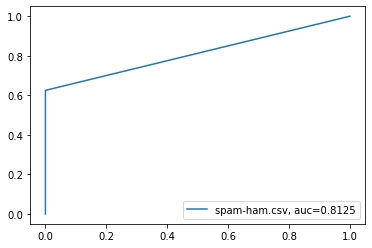

In [20]:


training_data, testing_data, y_train, y_test = train_test_split(msg, messages['Category'], test_size=0.20, random_state=0)

model = MultinomialNB() #Multinomail distribution (naive bayes classification) works better in case of counts.

model.fit(training_data, y_train)

pred = model.predict(testing_data)

accs = accuracy_score(y_test, pred)

print("Accuracy Score: ", accs)

fpr, tpr, _ = metrics.roc_curve(y_test,  pred)

auc = metrics.roc_auc_score(y_test, pred) #Find AUC score for the data set based on LR

print("AUC Score: ", auc)

plt.plot(fpr,tpr,label="spam-ham.csv, auc="+str(auc))
plt.legend(loc=4)
plt.show()